In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df=pd.read_excel('/content/Election_Data.xlsx')

In [ ]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.shape

(1525, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [ ]:
df.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [ ]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

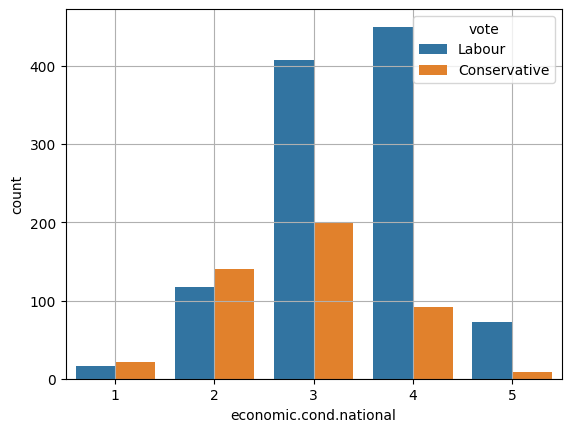

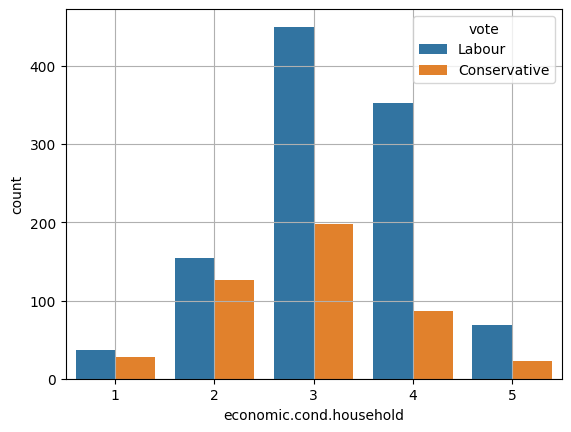

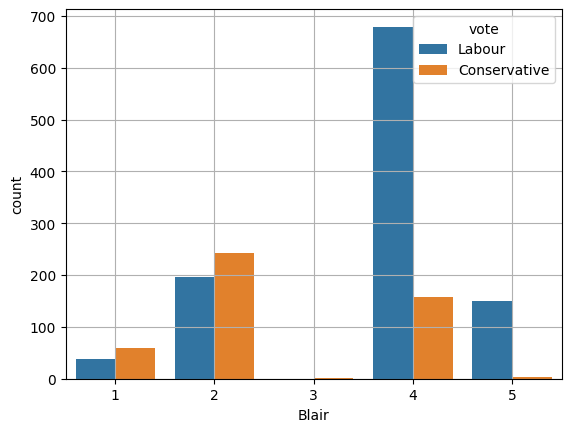

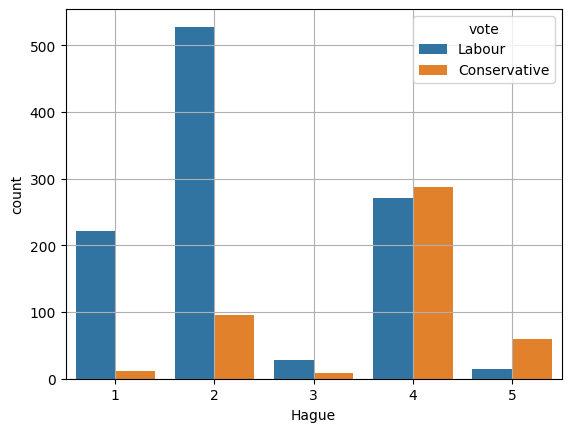

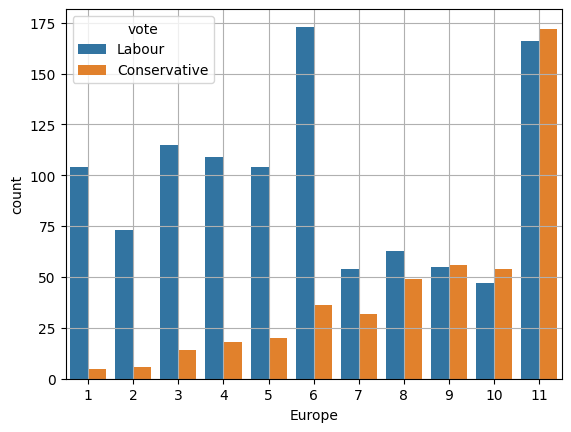

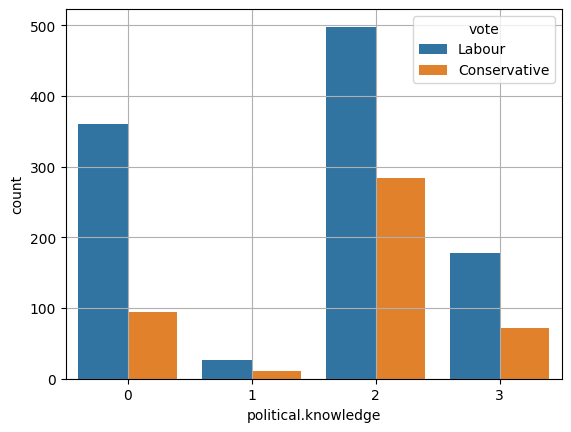

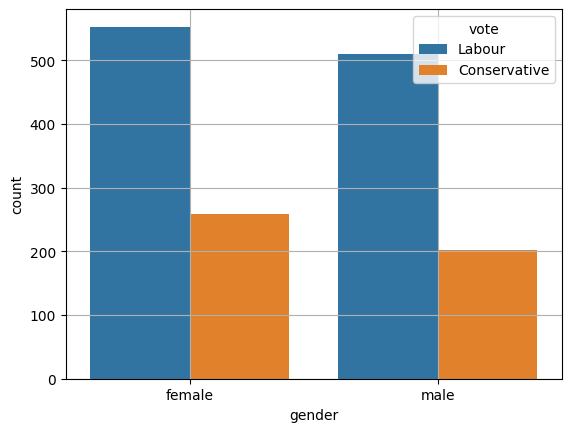

In [ ]:
cols = ['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
for i in cols:

    sns.countplot(data=df, x=df[i],hue='vote')
    plt.grid()
    plt.show();

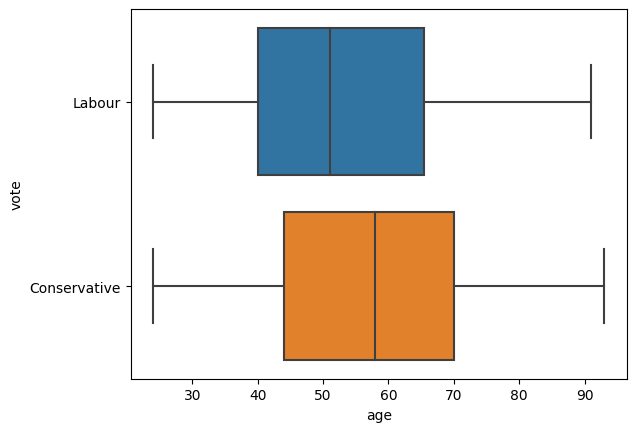

In [ ]:
sns.boxplot(data=df, x='age', y='vote');

In [ ]:
pd.crosstab(df['age'],df['vote']).T


age,24,25,26,27,28,29,30,31,32,33,...,84,85,86,87,88,89,90,91,92,93
vote,,,,,,,,,,,,,,,,,,,,,
Conservative,4,1,1,5,2,4,4,3,5,4,...,1,2,0,0,2,2,1,0,2,1
Labour,7,3,6,10,7,12,11,15,16,17,...,7,5,4,3,2,3,0,1,0,0


In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
pd.crosstab(df['political.knowledge'],df['vote'],normalize='index').T

political.knowledge,0,1,2,3
vote,,,,
Conservative,0.208791,0.289474,0.363171,0.288
Labour,0.791209,0.710526,0.636829,0.712


In [ ]:
pd.crosstab(df['gender'],df['vote'],normalize='index').T

gender,female,male
vote,,
Conservative,0.318966,0.284712
Labour,0.681034,0.715288


In [ ]:
pd.crosstab(df['Europe'],df['vote'],normalize='index').T

Europe,1,2,3,4,5,6,7,8,9,10,11
vote,,,,,,,,,,,
Conservative,0.045872,0.075949,0.108527,0.141732,0.16129,0.172249,0.372093,0.4375,0.504505,0.534653,0.508876
Labour,0.954128,0.924051,0.891473,0.858268,0.83871,0.827751,0.627907,0.5625,0.495495,0.465347,0.491124


In [ ]:
pd.crosstab(df['Blair'],df['vote'],normalize='index').T

Blair,1,2,3,4,5
vote,,,,,
Conservative,0.608247,0.552511,1.0,0.187799,0.019608
Labour,0.391753,0.447489,0.0,0.812201,0.980392


In [ ]:
pd.crosstab(df['Hague'],df['vote'],normalize='index').T

Hague,1,2,3,4,5
vote,,,,,
Conservative,0.04721,0.153846,0.243243,0.514337,0.808219
Labour,0.95279,0.846154,0.756757,0.485663,0.191781


In [ ]:
pd.crosstab(df['economic.cond.national'],df['vote'],normalize='index')

vote,Conservative,Labour
economic.cond.national,,
1,0.567568,0.432432
2,0.544747,0.455253
3,0.329489,0.670511
4,0.169742,0.830258
5,0.109756,0.890244


In [ ]:
pd.crosstab(df['economic.cond.household'],df['vote'],normalize='index')

vote,Conservative,Labour
economic.cond.household,,
1,0.430769,0.569231
2,0.450000,0.550000
3,0.305556,0.694444
4,0.197727,0.802273
5,0.250000,0.750000


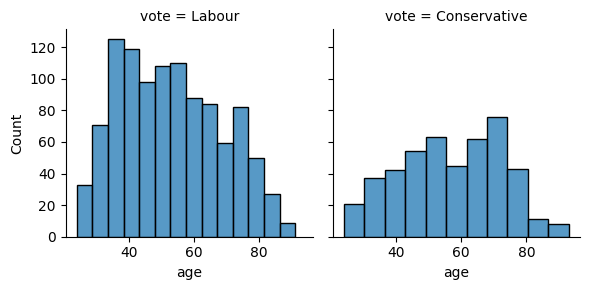

In [ ]:
g = sns.FacetGrid(df, col="vote")
g.map(sns.histplot, "age");

In [ ]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
features=['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

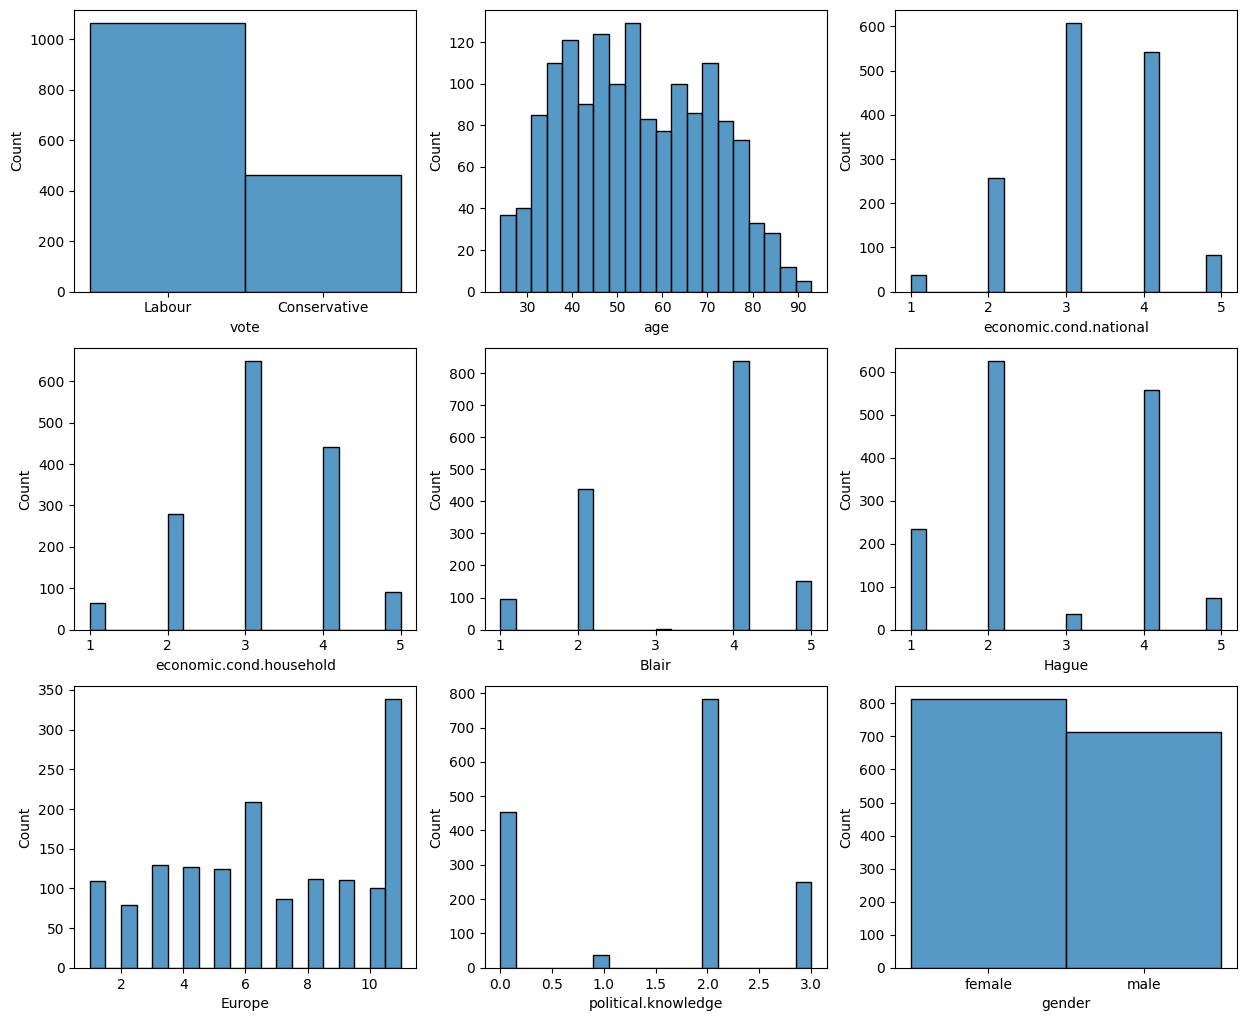

In [ ]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
  plt.subplot(7,3,i[0]+1)
  sns.histplot(data=df, x=i[1],kde=False,bins=20)

In [ ]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
features=[
 'age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

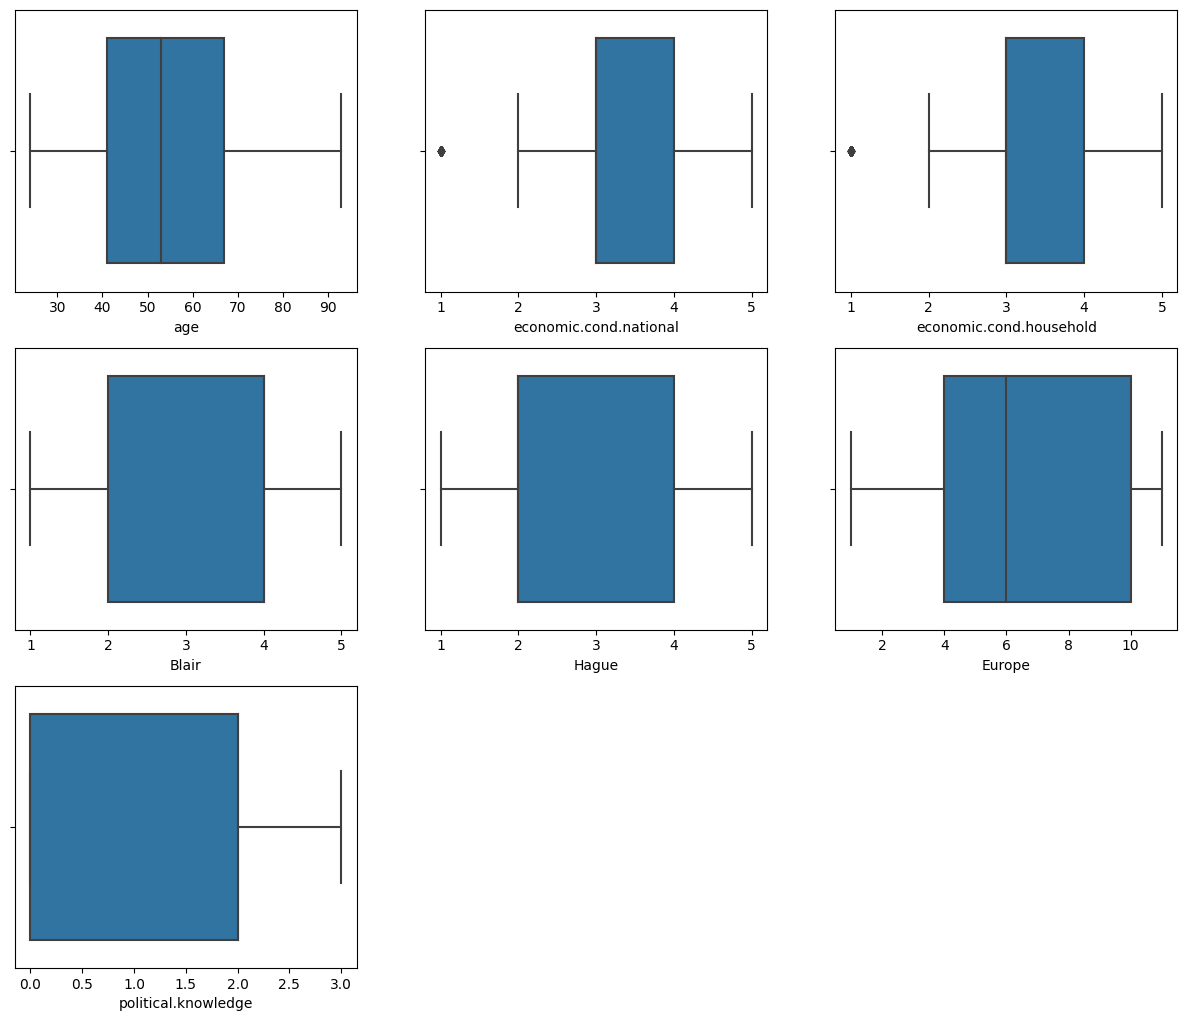

In [ ]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
  plt.subplot(7,3,i[0]+1)
  sns.boxplot(data=df, x=i[1])

In [ ]:
df['economic.cond.national'].value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic.cond.national, dtype: float64

In [ ]:
df['economic.cond.household'].value_counts(normalize=True)

3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: economic.cond.household, dtype: float64

In [ ]:
df['vote'].value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'int64':
        print(feature)
        print(df[feature].value_counts())
        print('\n')

age
37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64


economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Blair
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


Hague
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


political.knowledge
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64




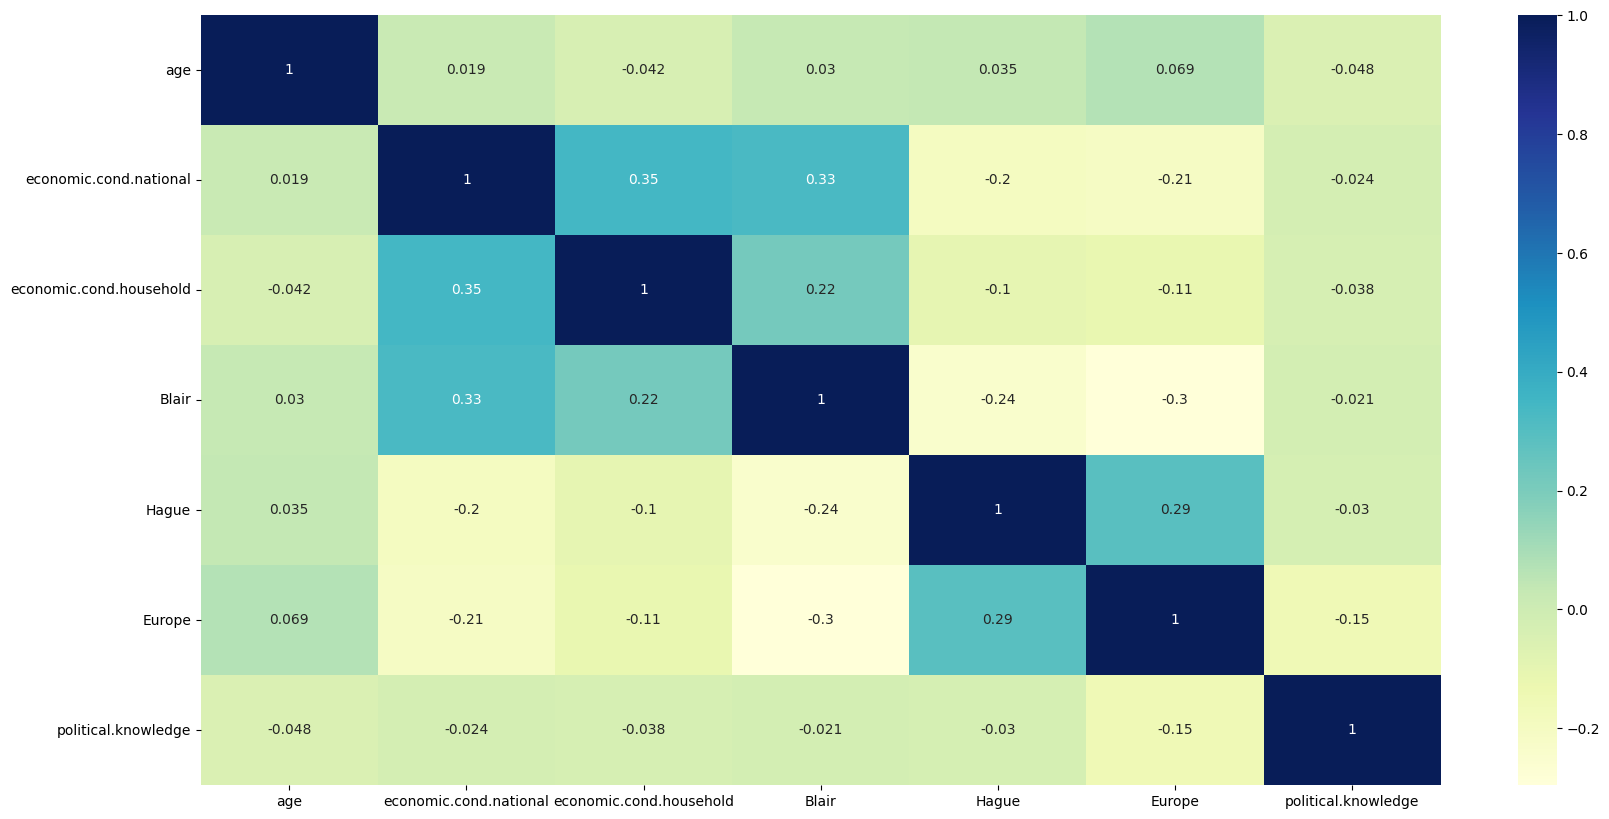

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True, cmap='YlGnBu');

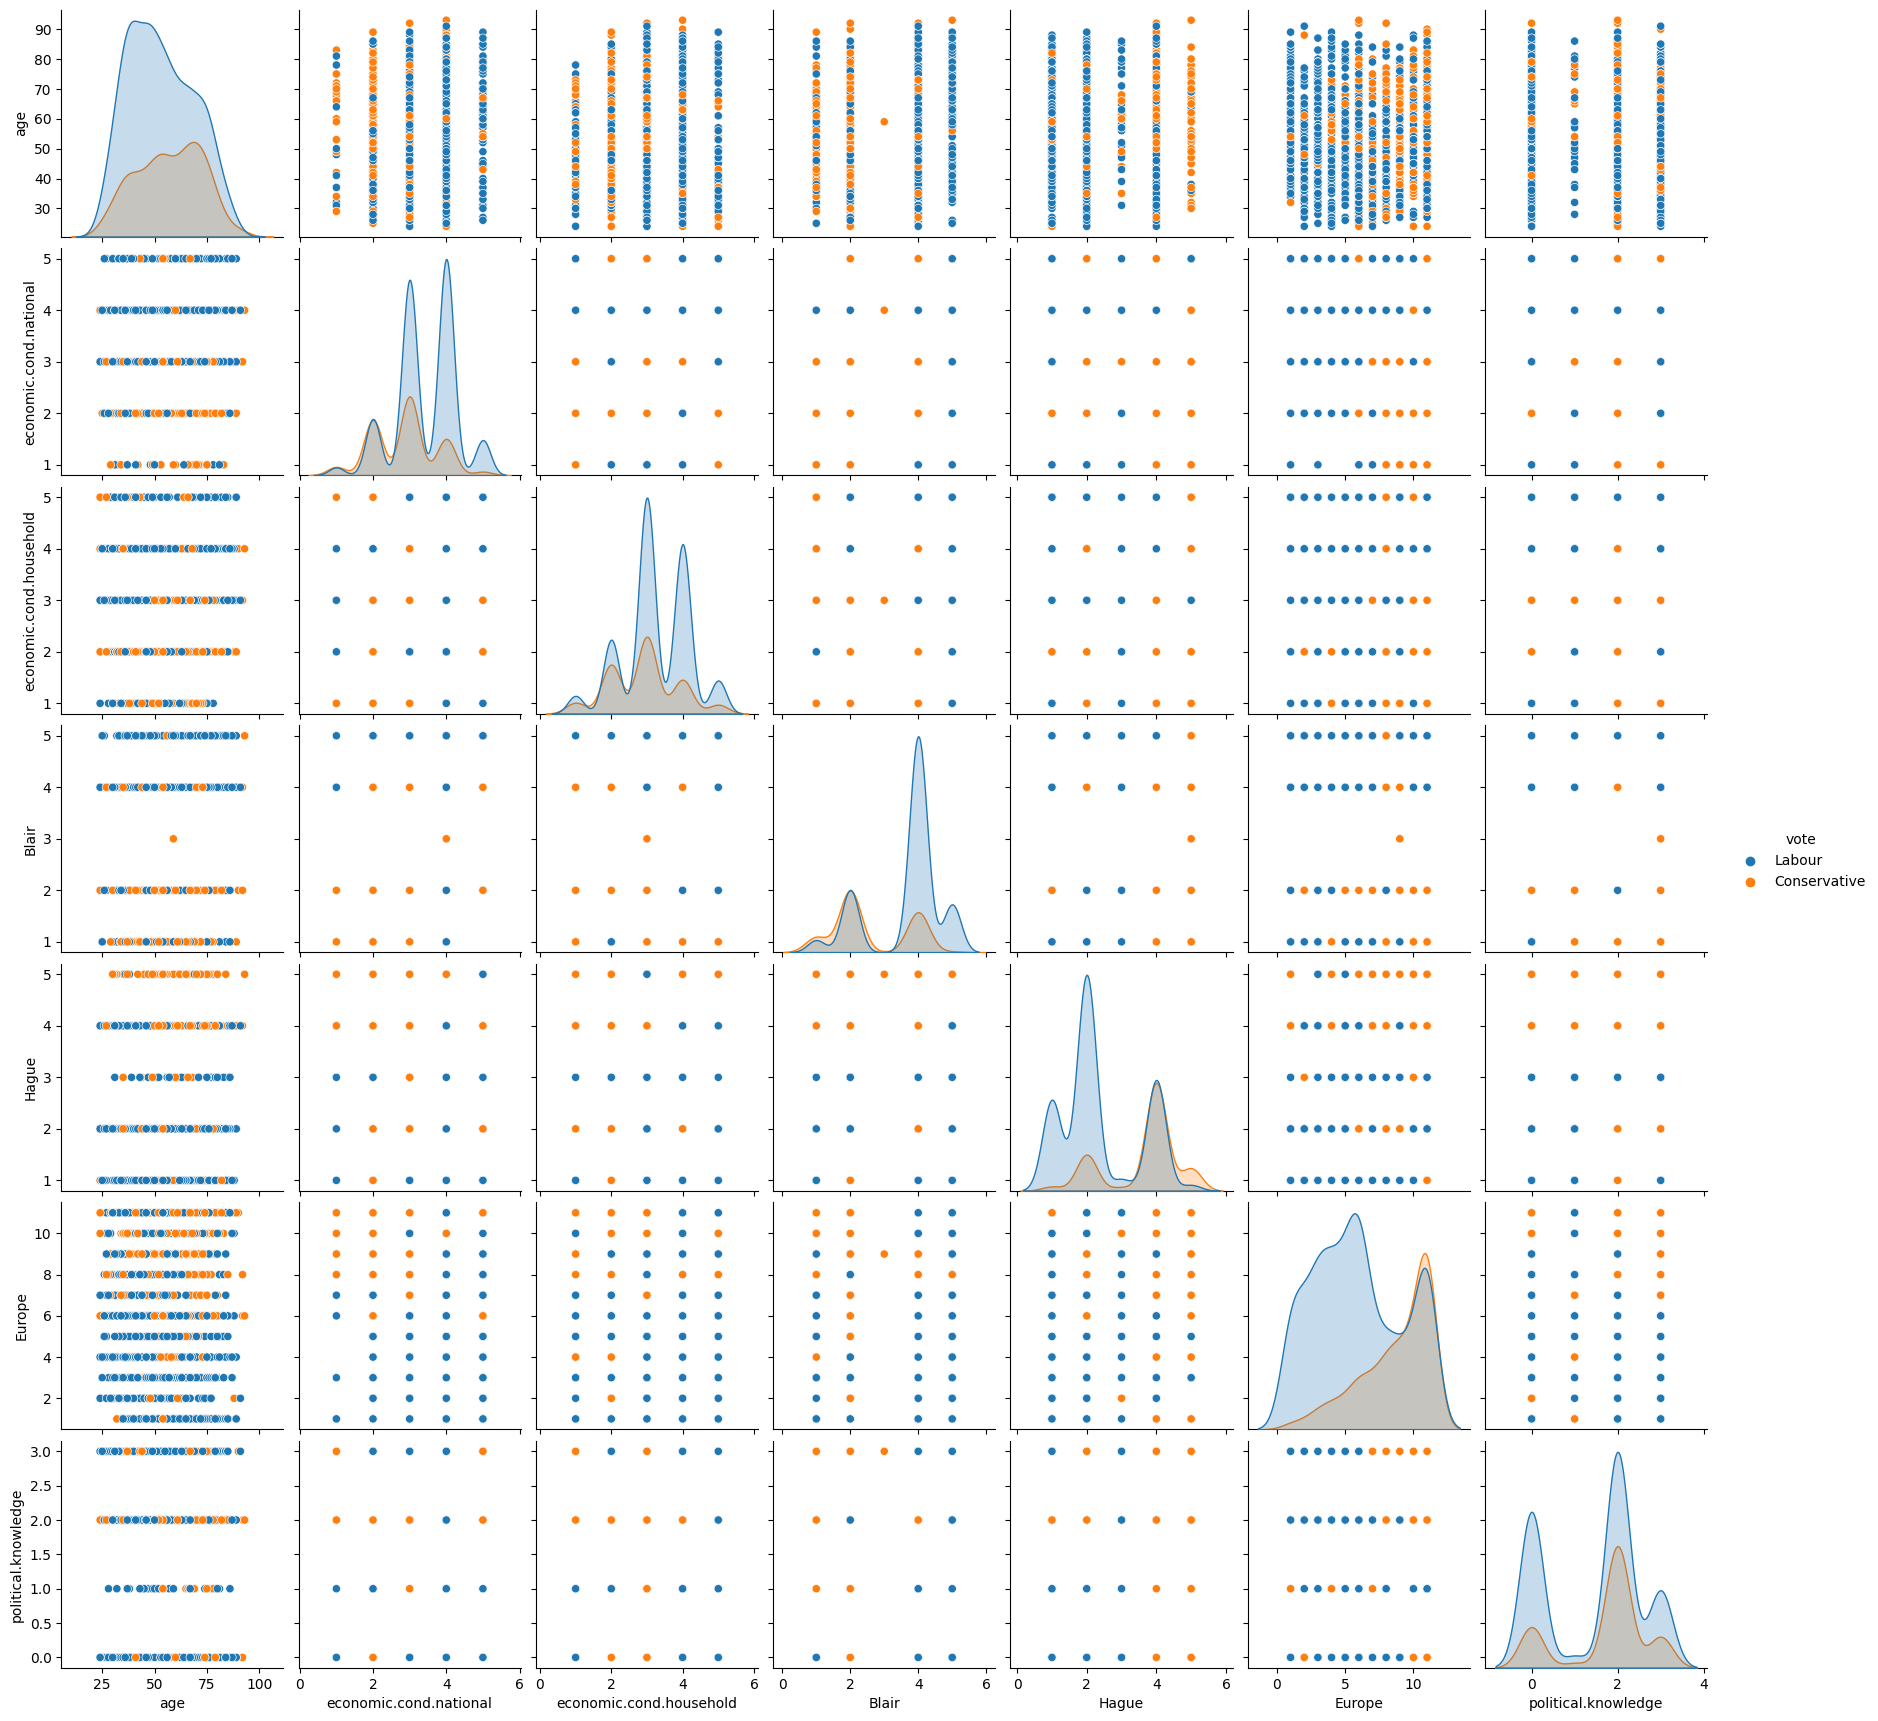

In [ ]:
sns.pairplot(df , hue='vote' , diag_kind = 'kde')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
df.vote.value_counts()


Labour          1063
Conservative     462
Name: vote, dtype: int64

In [ ]:
df.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [ ]:
df['gender']=np.where(df['gender']=='female',0,df['gender'])
df['gender']=np.where(df['gender']=='male',1,df['gender'])

In [ ]:
df['vote']=np.where(df['vote']=='Labour',0,df['vote'])
df['vote']=np.where(df['vote']=='Conservative',1,df['vote'])

In [ ]:

df['vote'] = df['vote'].astype('int64')
df['gender'] = df['gender'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


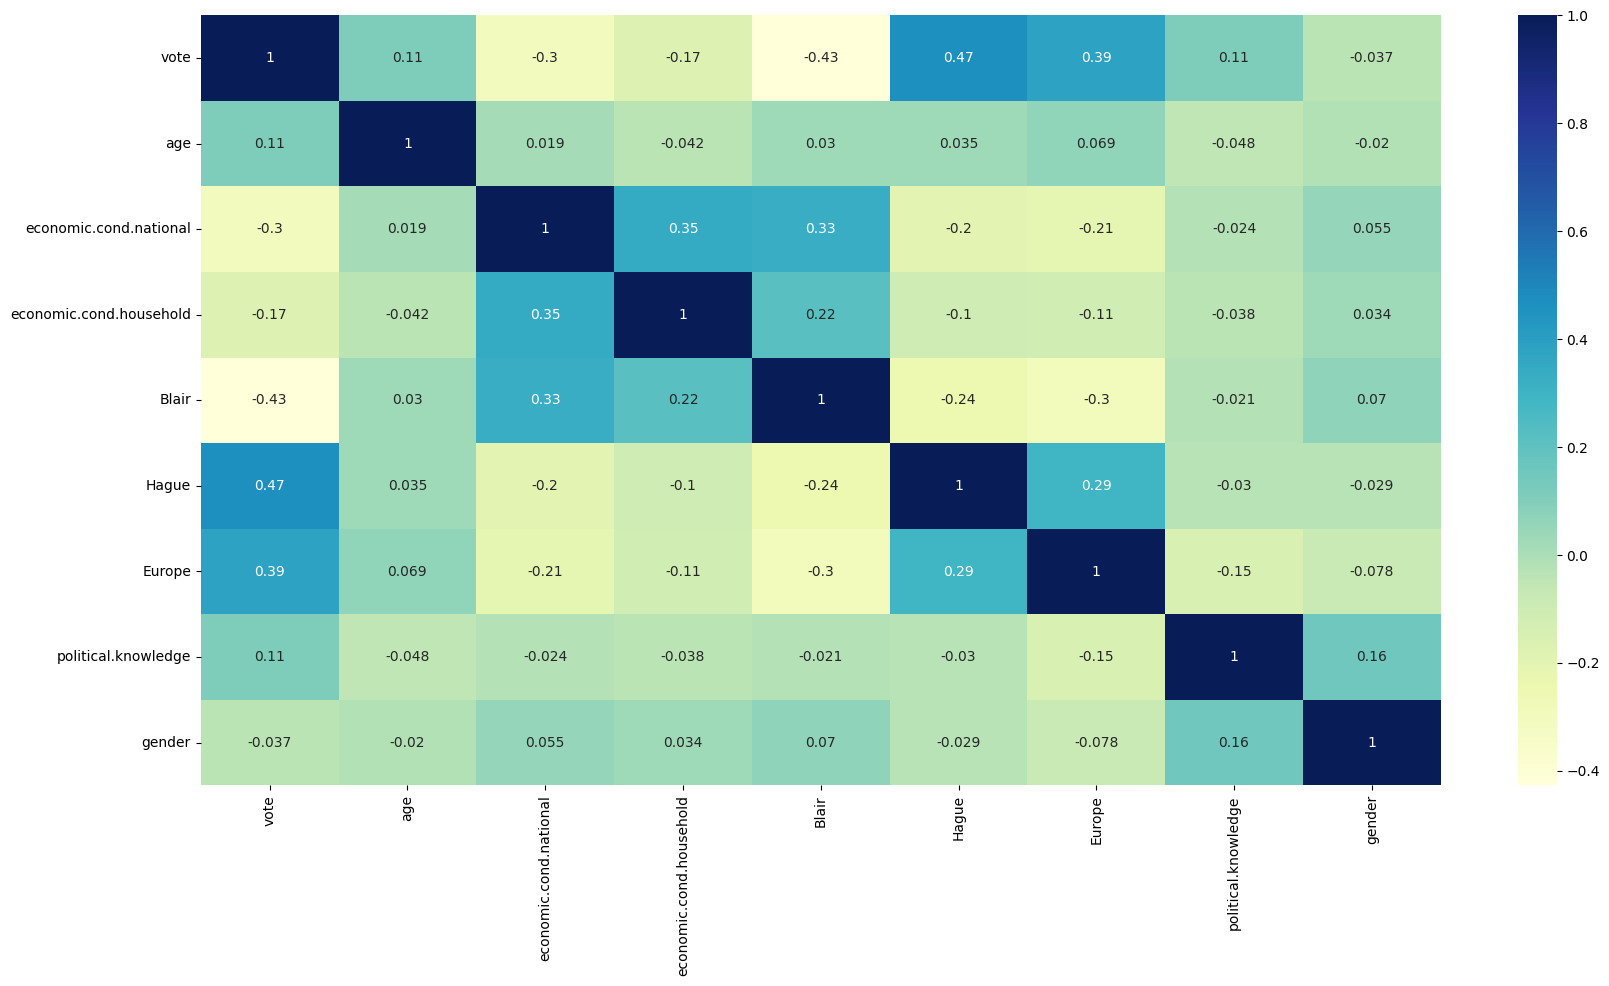

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True, cmap='YlGnBu');

In [ ]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,0.302951,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,0.467541
std,0.459685,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,0.499109
min,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,0.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
model=scaler.fit(df)
scaled_df=model.transform(df)
df1=pd.DataFrame(scaled_df,columns=df.columns)


In [ ]:
df1

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0
...,...,...,...,...,...,...,...,...,...
1520,1.0,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,1.0
1521,1.0,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,1.0
1522,0.0,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,1.0
1523,1.0,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = df1.drop('vote', axis=1)

# Copy target into the y dataframe.
y = df1['vote']

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['vote'])

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Accuracy - Training Data
print(model.score(X_train, y_train))
# Accuracy - Test Data
model.score(X_test, y_test)

0.8247422680412371


0.8580786026200873

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1067, 8)
(458, 8)


In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8247422680412371

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8580786026200873

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       744
         1.0       0.75      0.63      0.69       323

    accuracy                           0.82      1067
   macro avg       0.80      0.77      0.78      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.83      0.67      0.74       139

    accuracy                           0.86       458
   macro avg       0.85      0.80      0.82       458
weighted avg       0.86      0.86      0.85       458
 



Train_AUC: 0.879
Test_AUC: 0.912


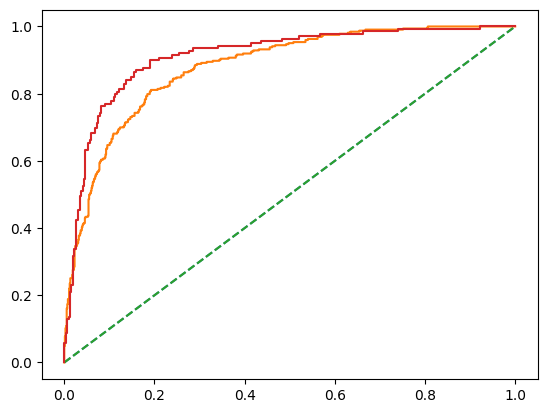

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

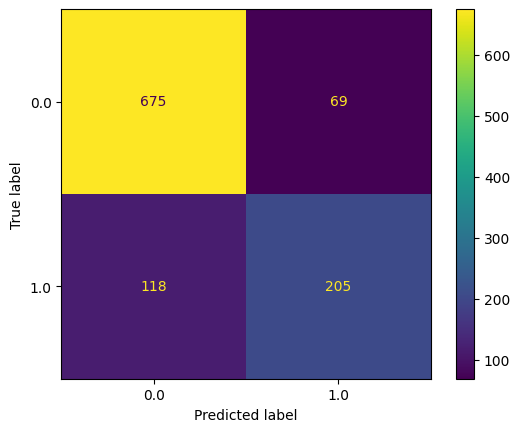

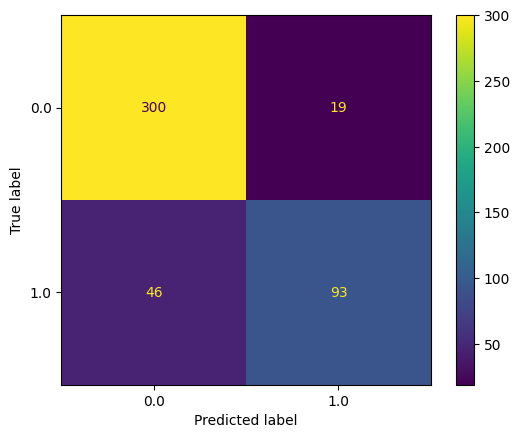

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

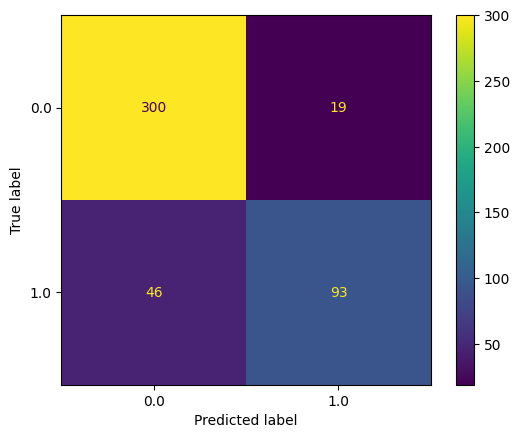

In [ ]:
cm = confusion_matrix(y_test, pred_class_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': abs(model.coef_[0])})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
4,Hague,2.776745
3,Blair,2.276943
5,Europe,1.860195
1,economic.cond.national,1.265066
0,age,1.155321
6,political.knowledge,1.134529
2,economic.cond.household,0.321704
7,gender,0.109167


In [ ]:
#Import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       744
         1.0       0.74      0.65      0.69       323

    accuracy                           0.82      1067
   macro avg       0.80      0.78      0.78      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.83      0.68      0.75       139

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.82       458
weighted avg       0.86      0.86      0.86       458
 



In [ ]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
#coefficients for the Linear Discriminant Function
list(model1.coef_)[0]

array([ 1.66617893, -1.35015656, -0.29658662, -3.01783481,  3.40947678,
        2.160267  ,  1.46661633, -0.0768813 ])

In [ ]:
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': abs(model1.coef_[0])})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
4,Hague,3.409477
3,Blair,3.017835
5,Europe,2.160267
0,age,1.666179
6,political.knowledge,1.466616
1,economic.cond.national,1.350157
2,economic.cond.household,0.296587
7,gender,0.076881


In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       744
         1.0       0.74      0.65      0.69       323

    accuracy                           0.82      1067
   macro avg       0.80      0.78      0.78      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.83      0.68      0.75       139

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.82       458
weighted avg       0.86      0.86      0.86       458
 



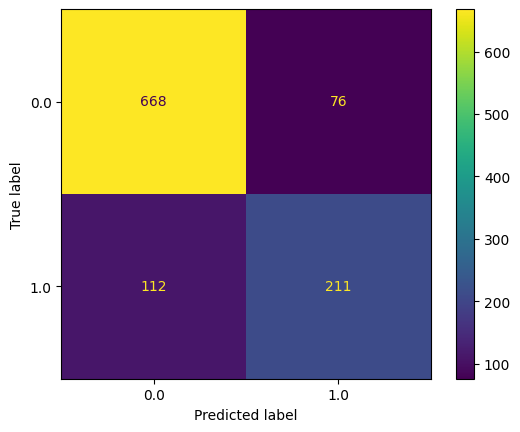

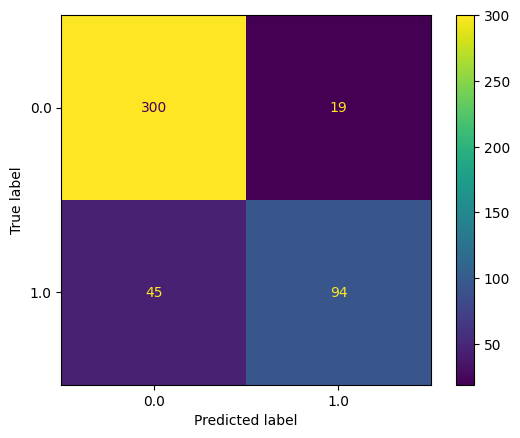

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()



Train_AUC: 0.879
Test_AUC: 0.911


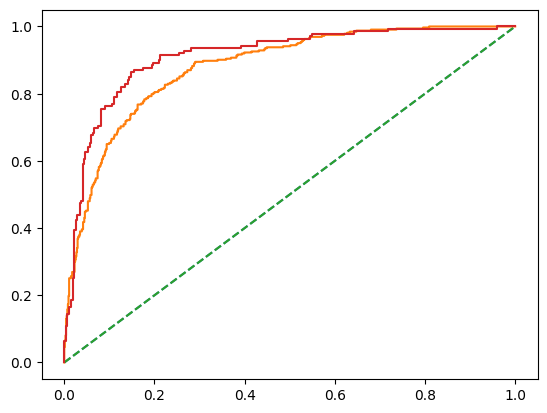

In [ ]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected1 = y_train
predicted1 = model.predict(X_train)
# summarize the fit of the model
print('Classification Report of the training data:\n\n',metrics.classification_report(expected1, predicted1))



# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print('Classification Report of the test data:\n\n',metrics.classification_report(expected, predicted))



GaussianNB()
Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       744
         1.0       0.71      0.69      0.70       323

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.78      1067
weighted avg       0.82      0.82      0.82      1067

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       319
         1.0       0.79      0.73      0.76       139

    accuracy                           0.86       458
   macro avg       0.84      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458



In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

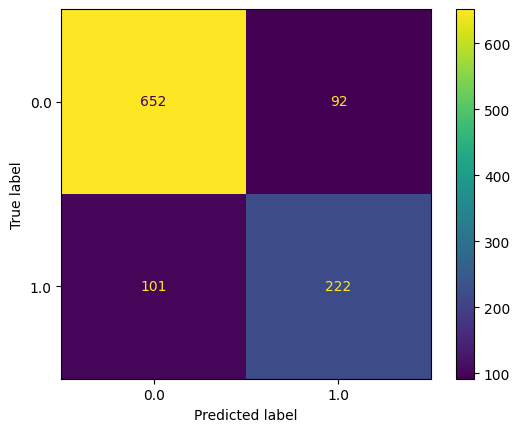

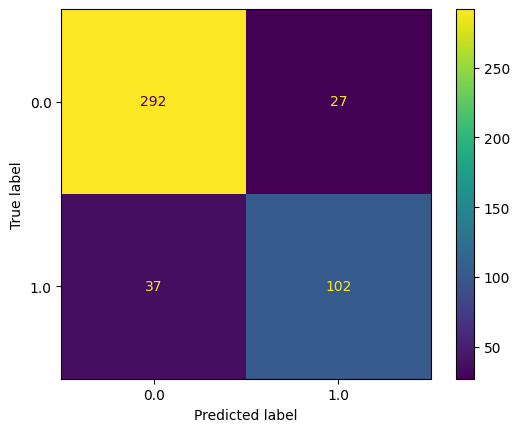

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()


Train_AUC: 0.875
Test_AUC: 0.910


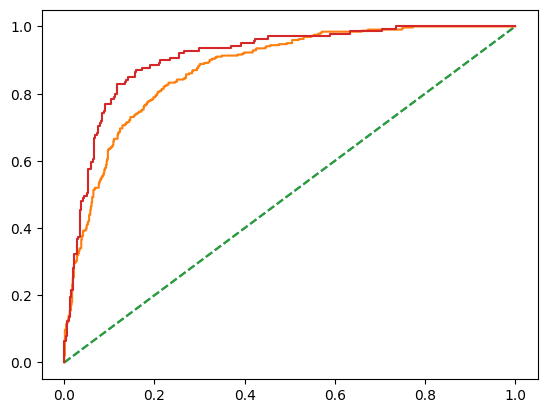

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:

from sklearn.inspection import permutation_importance

In [ ]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
imps = permutation_importance(model, X_train, y_train)
x=imps.importances_mean
x

array([0.00599813, 0.01574508, 0.0031865 , 0.04067479, 0.05417057,
       0.03805061, 0.00899719, 0.00056232])

In [ ]:
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': abs(x)})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
4,Hague,0.054171
3,Blair,0.040675
5,Europe,0.038051
1,economic.cond.national,0.015745
6,political.knowledge,0.008997
0,age,0.005998
2,economic.cond.household,0.003187
7,gender,0.000562


In [ ]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8187772925764192
Accuracy Score for K=5 is  0.834061135371179
Accuracy Score for K=9 is  0.8537117903930131


In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.222707423580786,
 0.18122270742358082,
 0.16593886462882101,
 0.15502183406113534,
 0.14628820960698685,
 0.15720524017467252,
 0.15720524017467252,
 0.15283842794759828,
 0.14847161572052403,
 0.15283842794759828]

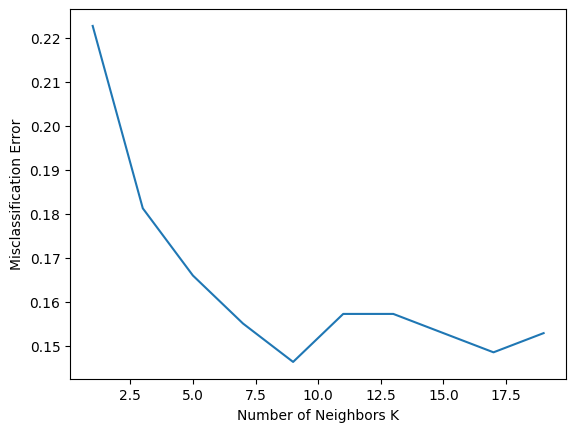

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

pred_class_train = KNN_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = KNN_model.predict(X_test)

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       744
         1.0       0.74      0.67      0.71       323

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       319
         1.0       0.82      0.67      0.74       139

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.85      0.85       458
 



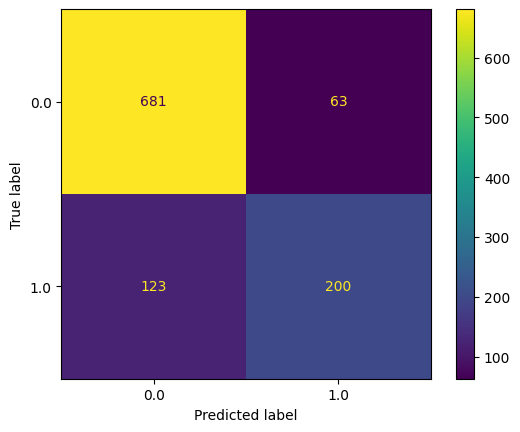

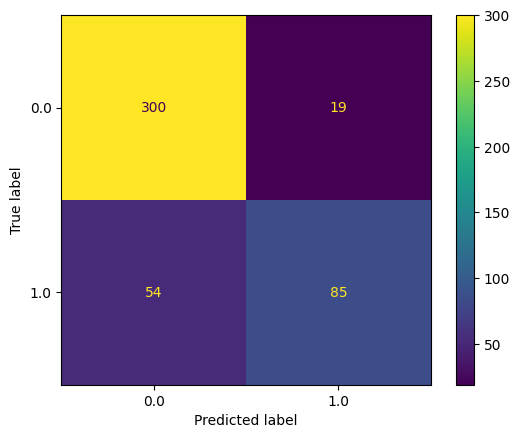

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=KNN_model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=KNN_model.classes_)
disp.plot()
plt.show()


Train_AUC: 0.895
Test_AUC: 0.910


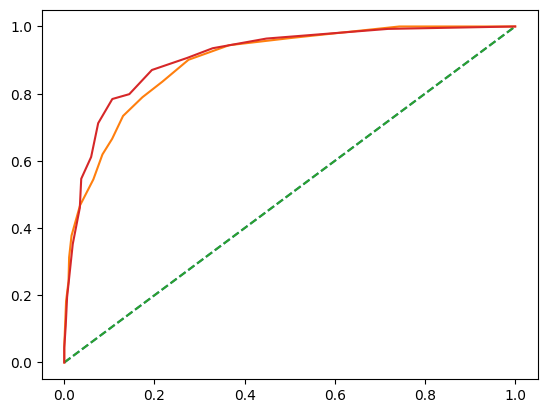

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#model Tuning-------------

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Accuracy - Training Data
print(model.score(X_train, y_train))
# Accuracy - Test Data
model.score(X_test, y_test)

0.8247422680412371


0.8580786026200873

#grid search cv on logistic regression


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],

    }
]
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.8228795626873568


In [ ]:
logreg2=LogisticRegression(C=0.615848211066026, penalty='l1',solver='saga')
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.8580786026200873


In [ ]:
pred_class_train = logreg2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = logreg2.predict(X_test)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       744
         1.0       0.75      0.63      0.68       323

    accuracy                           0.82      1067
   macro avg       0.80      0.77      0.78      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.83      0.67      0.74       139

    accuracy                           0.86       458
   macro avg       0.85      0.80      0.82       458
weighted avg       0.86      0.86      0.85       458
 



#grid search cv on LDA

In [ ]:
param_grid = [{'solver' : ['svd','lsqr', 'eigen']}]
clf1 = LinearDiscriminantAnalysis()
clf1_cv=GridSearchCV(clf1,param_grid,cv=10)
clf1_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf1_cv.best_params_)
print("accuracy :",clf1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'solver': 'svd'}
accuracy : 0.820067007582437


In [ ]:
clf1_cv1=LinearDiscriminantAnalysis(solver='svd')
clf1_cv1.fit(X_train,y_train)
print("score",clf1_cv1.score(X_test,y_test))

score 0.8602620087336245


In [ ]:
pred_class_train = clf1_cv1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clf1_cv1.predict(X_test)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       744
         1.0       0.74      0.65      0.69       323

    accuracy                           0.82      1067
   macro avg       0.80      0.78      0.78      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.83      0.68      0.75       139

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.82       458
weighted avg       0.86      0.86      0.86       458
 



#grid search cv on knn

In [ ]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [ ]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [ ]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8163375066125903
{'n_neighbors': 16, 'weights': 'uniform'}


In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors = 16,weights='uniform')

# fitting the model
KNN_model.fit(X_train,y_train)

pred_class_train = KNN_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = KNN_model.predict(X_test)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       744
         1.0       0.76      0.62      0.68       323

    accuracy                           0.83      1067
   macro avg       0.80      0.77      0.78      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       319
         1.0       0.82      0.61      0.70       139

    accuracy                           0.84       458
   macro avg       0.83      0.78      0.80       458
weighted avg       0.84      0.84      0.83       458
 



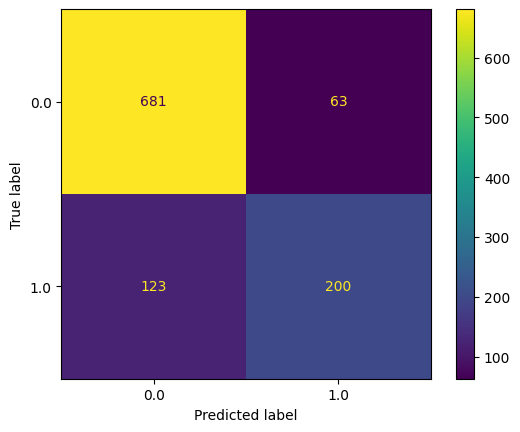

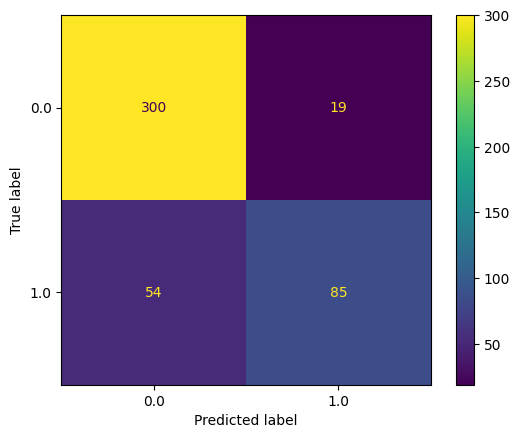

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=KNN_model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=KNN_model.classes_)
disp.plot()
plt.show()


Train_AUC: 0.895
Test_AUC: 0.910


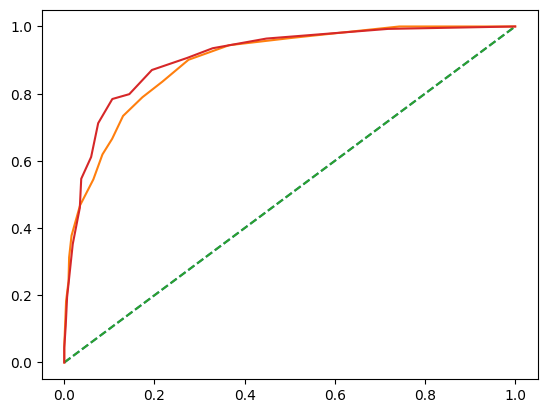

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#gridsearch on naive bayes

In [ ]:
param_grid={}
clf3 = GaussianNB()
clf3_cv=GridSearchCV(clf3,param_grid,cv=10)
clf3_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={})

In [ ]:
print(clf3_cv.best_score_)
print(clf3_cv.best_params_)

0.8125374713454416
{}


In [ ]:
print("score",clf3_cv.score(X_test,y_test))

score 0.8602620087336245


#ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)

print('Classification Report of the train data:\n\n',metrics.classification_report(y_train, y_train_predict))

y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))


Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       744
         1.0       0.77      0.67      0.72       323

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.82      0.67      0.74       139

    accuracy                           0.86       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.86      0.85       458



In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8558951965065502
[[299  20]
 [ 46  93]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       319
         1.0       0.82      0.67      0.74       139

    accuracy                           0.86       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.86      0.85       458



In [ ]:
pred_class_train = ADB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ADB_model.predict(X_test)

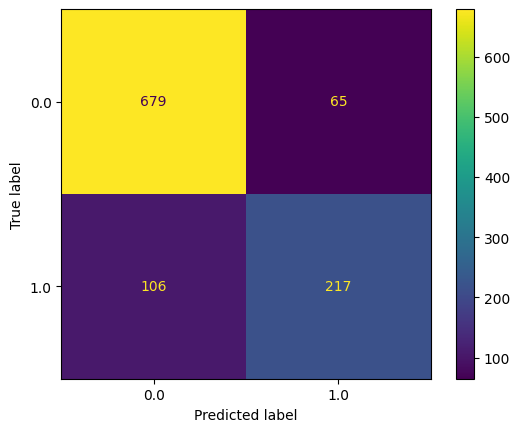

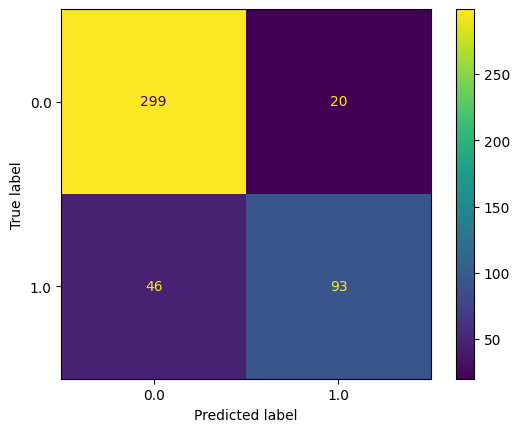

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=ADB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ADB_model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=ADB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ADB_model.classes_)
disp.plot()
plt.show()


Train_AUC: 0.903
Test_AUC: 0.898


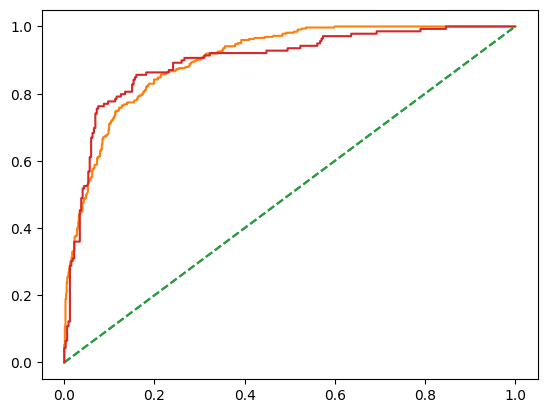

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
feature_importance = ADB_model.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
0,age,0.75
4,Hague,0.06
3,Blair,0.05
5,Europe,0.05
1,economic.cond.national,0.04
2,economic.cond.household,0.03
6,political.knowledge,0.02
7,gender,0.00


#gradent boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)

print('Classification Report of the train data:\n\n',metrics.classification_report(y_train, y_train_predict))



## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))



Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       744
         1.0       0.82      0.73      0.77       323

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       319
         1.0       0.84      0.70      0.76       139

    accuracy                           0.87       458
   macro avg       0.86      0.82      0.84       458
weighted avg       0.87      0.87      0.87       458



In [ ]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))

0.868995633187773
[[301  18]
 [ 42  97]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       319
         1.0       0.84      0.70      0.76       139

    accuracy                           0.87       458
   macro avg       0.86      0.82      0.84       458
weighted avg       0.87      0.87      0.87       458



In [ ]:
pred_class_train = gbcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gbcl.predict(X_test)

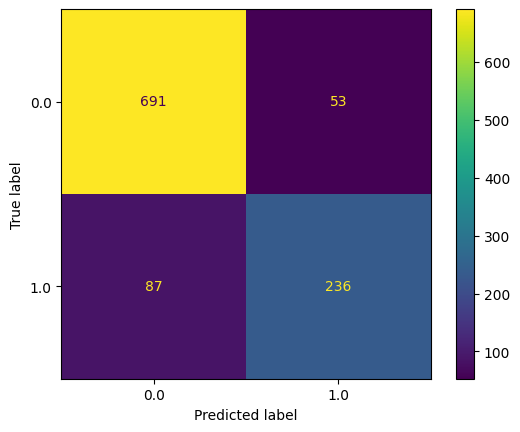

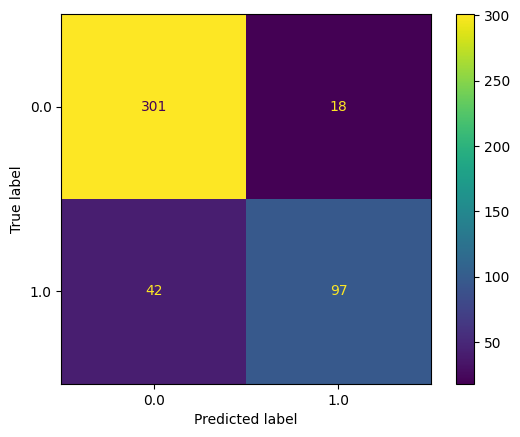

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=gbcl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbcl.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=gbcl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbcl.classes_)
disp.plot()
plt.show()


Train_AUC: 0.942
Test_AUC: 0.927


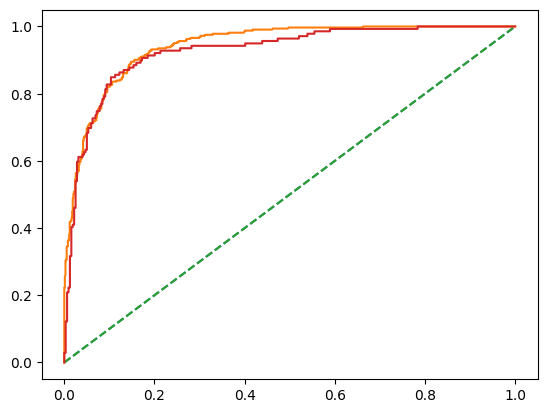

In [ ]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:

feature_importance = gbcl.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df


,features,importance
3,Blair,0.305428
4,Hague,0.252732
5,Europe,0.135768
0,age,0.119538
6,political.knowledge,0.109986
1,economic.cond.national,0.045332
2,economic.cond.household,0.029594
7,gender,0.001621


#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bc = BaggingClassifier(random_state=1)
Bc = Bc.fit(X_train, y_train)

In [ ]:
y_train_predict = Bc.predict(X_train)
model_score = Bc.score(X_train, y_train)

print('Classification Report of the train data:\n\n',metrics.classification_report(y_train, y_train_predict))



## Performance Matrix on test data set
y_test_predict = Bc.predict(X_test)
model_score = Bc.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))


Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       744
         1.0       0.99      0.95      0.97       323

    accuracy                           0.98      1067
   macro avg       0.99      0.97      0.98      1067
weighted avg       0.98      0.98      0.98      1067

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.85      0.91      0.87       319
         1.0       0.74      0.62      0.67       139

    accuracy                           0.82       458
   macro avg       0.79      0.76      0.77       458
weighted avg       0.81      0.82      0.81       458



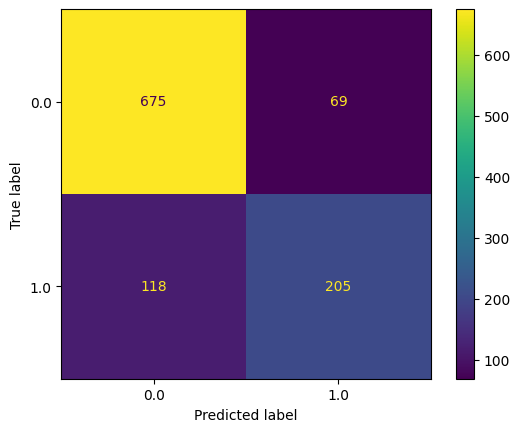

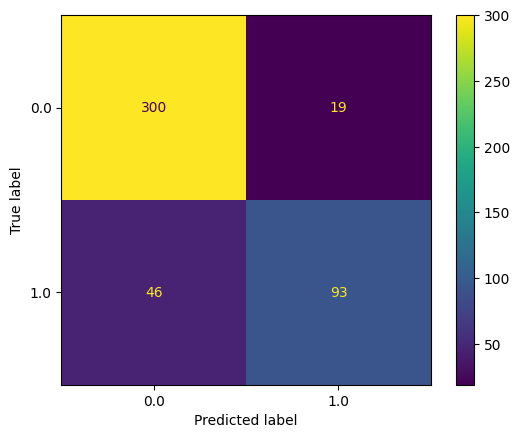

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=Bc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Bc.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=Bc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Bc.classes_)
disp.plot()
plt.show()

Train_AUC: 0.999
Test_AUC: 0.882


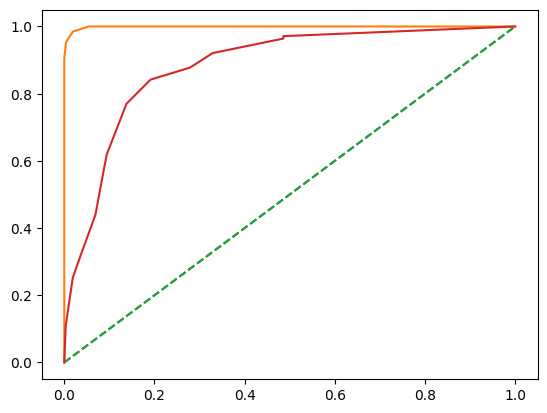

In [ ]:
# predict probabilities
probs = Bc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = Bc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
from sklearn.ensemble import BaggingClassifier

dtc_params = {
    'max_features': [0.5, 0.7, 1.0],
    'max_samples': [0.5, 0.7, 1.0],
    'n_estimators': [2, 5, 10, 20,50,100],
}

dtc_gs = GridSearchCV(BaggingClassifier(), dtc_params, cv=5, verbose=1)
dtc_gs.fit(X_train, y_train)
dtc_best = dtc_gs.best_estimator_

# Got this code from stack overflow. It is what Randomforrest does OOB. Averages the importances from each of
# the ensemble trees.
feature_importances = np.mean([
    tree.feature_importances_ for tree in dtc_best.estimators_
], axis=0)

print("tuned hpyerparameters :(best parameters) ",dtc_gs.best_params_)
print("accuracy :",dtc_gs.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
tuned hpyerparameters :(best parameters)  {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 100}
accuracy : 0.8069720503707606


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_features=0.5)
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1,max_samples=0.7)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=0.5),
                  max_samples=0.7, n_estimators=100, random_state=1)

In [ ]:
df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(Bagging_model, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.80373832 0.74766355 0.83098592 0.82159624 0.81690141]
Average CV Score:  0.8041770874467993


In [ ]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(Bagging_model, X_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.89130435 0.83695652 0.83695652 0.85714286 0.93406593]
Average CV Score:  0.8712852365026278


In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)

print('Classification Report of the train data:\n\n',metrics.classification_report(y_train, y_train_predict))

y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))

Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       744
         1.0       0.99      0.97      0.98       323

    accuracy                           0.99      1067
   macro avg       0.99      0.98      0.99      1067
weighted avg       0.99      0.99      0.99      1067

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       319
         1.0       0.79      0.71      0.75       139

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)

print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       319
         1.0       0.79      0.71      0.75       139

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



In [ ]:
pred_class_train = Bagging_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = Bagging_model.predict(X_test)

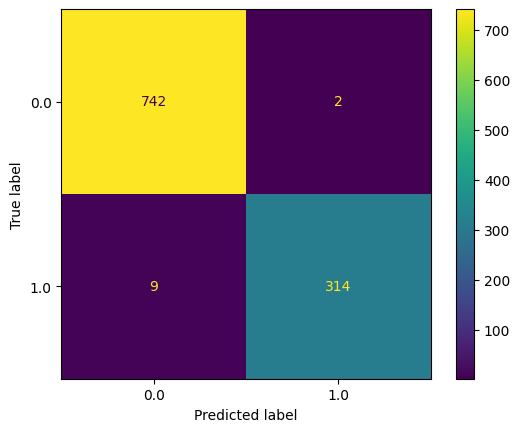

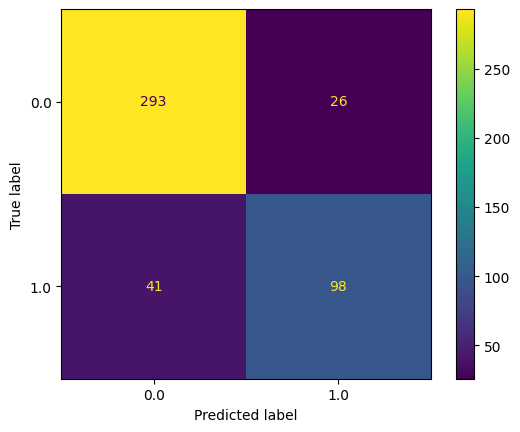

In [ ]:
cm = confusion_matrix(y_train, pred_class_train, labels=Bagging_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Bagging_model.classes_)
disp.plot()
plt.show()

cm = confusion_matrix(y_test, pred_class_test, labels=Bagging_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Bagging_model.classes_)
disp.plot()
plt.show()

In [ ]:
feature_importances

array([0.24636905, 0.25772196, 0.25036748, 0.24554152])

In [ ]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

Train_AUC: 1.000
Test_AUC: 0.913


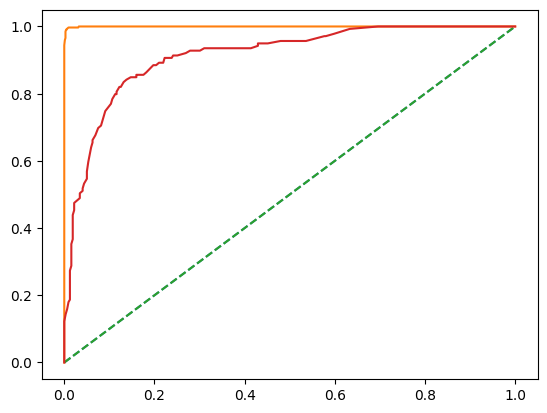

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);